# Oscillators phase space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import RungeKuttaMethod_AllValues as RK4

## Lorentz Oscillator Solution

In [2]:
sigma = 10.0 #Variable for dx/dt
rho = 28.0 #Variable for dy/dt
beta = 8/3 #Variable for dz/dt
t = 0 #Starting time
tf = 30 #Ending time
h = 0.01 #Step size for RK4
#These variables were used since they can be easily found for comparison, 
#for example, in Wikipedia under the Lorenz system article

## Movement equations

$\frac{dx}{dt} = \sigma (y-x)$

$\frac{dy}{dt} = x(\rho-z)-y$

$\frac{dz}{dt} = (yx-\beta z)$

In [3]:
#Derivative function to work with RK4 loop
def derivative(r,t,params):
    x = r[0]
    y = r[1]
    z = r[2]
    return np.array([sigma * (y - x), x * (rho - z) - y, (x * y) - (beta * z)])

In [4]:
time = np.array([]) #Empty time array to fill for the x-axis
r = [1.0, 1.0, 1.0] #Initial conditions array

In [5]:
R = RK4.RKN4_1fstODE(derivative,r,0, 30,h,[])        #Updating time value with step size

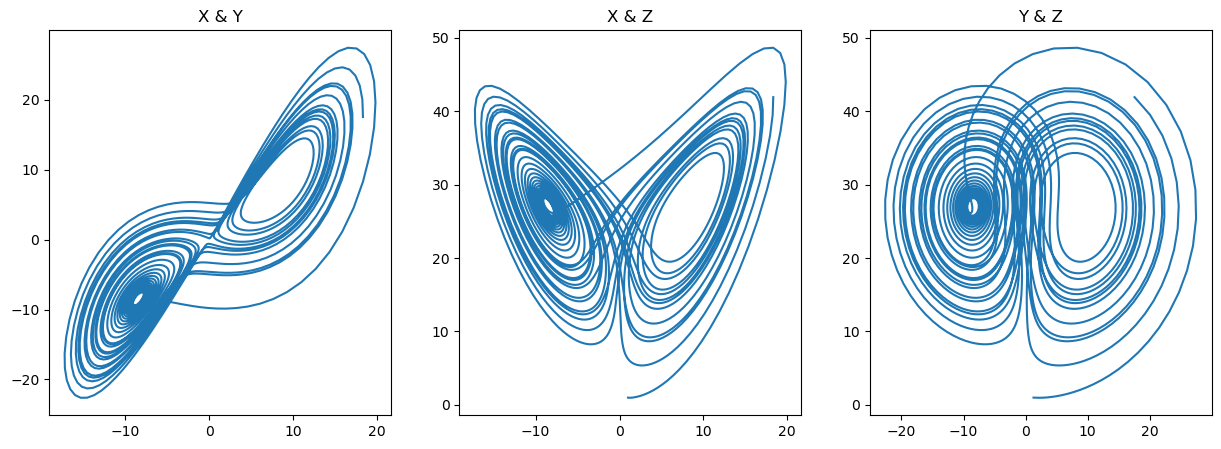

In [6]:
#Multiple graph plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.plot(R[0], R[1])
ax1.set_title("X & Y")
ax2.plot(R[0], R[2])
ax2.set_title("X & Z")
ax3.plot(R[1], R[2])
ax3.set_title("Y & Z")
plt.show()

## Harmonic Oscillator

In [7]:
h = 0.01
time = np.arange(0,10+h,h) 

In [8]:
def HO_Acceleration(x,v,t,w):
    ddx = -(w*x)
    return ddx

In [13]:
X = np.array([1])
V = np.array([0])

In [14]:
X, V = RK4.RKN4_2ndODE(HO_Acceleration,X,V,0,10,h,[2])        #Updating time value with step size
           #RK4 Step method

In [16]:
X.shape

(1, 1001)

In [12]:
#%matplotlib qt

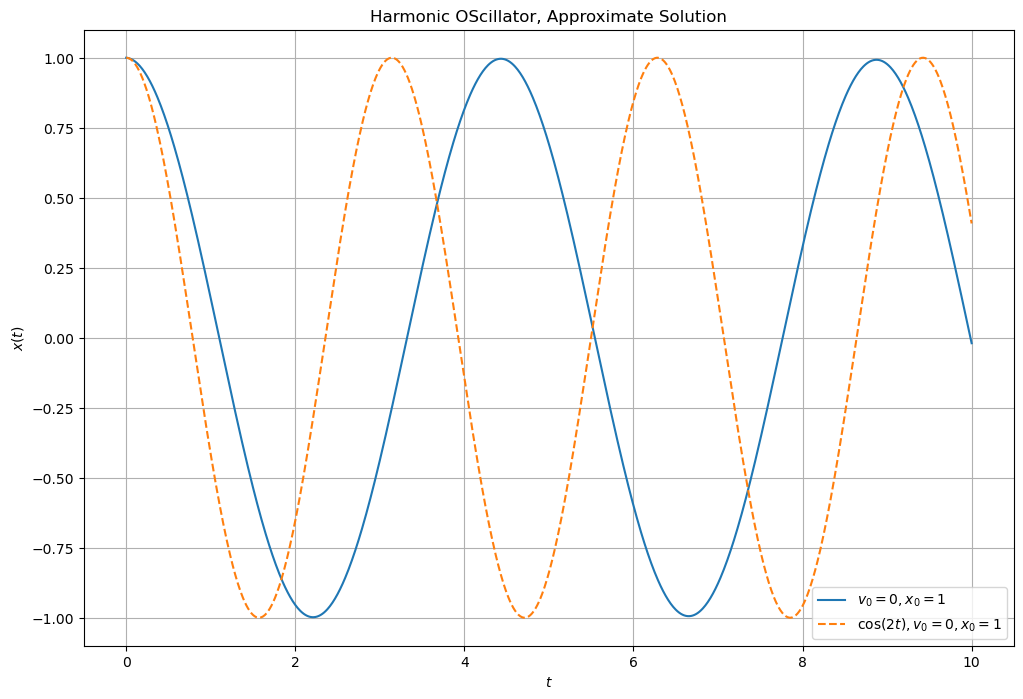

In [17]:
plt.figure(figsize = (12, 8))
plt.plot(time,X[0,:], '-', label=r'$v_{0} = 0, x_{0} = 1$')
plt.plot(time,np.cos(2*time), '--', label=r'$\cos(2t), v_{0}=0, x_{0}=1$')
# plt.plot(time,np.sin(2*time)/2, '--', label=r'$v_{0}=1, x_{0}=0$')
plt.title('Harmonic OScillator, Approximate Solution')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.grid()
#lt.yscale('log')
# plt.ylim(-5,20)
plt.legend(loc='lower right')
plt.show()